# Project 3 - Stocks

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
        # Use below code to print total after each i is added
        #print(i, total)
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    lst_obj = sorted(list_obj)
    if n % 2 != 0:
        # Uses if list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # Passes slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
    return median_

def mode(list_obj):
    # To record values that appear the most
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

def variance(list_obj, sample = False):
    # Saves the mean value of list
    list_mean = mean(list_obj)
    # n is used to calculate the average of sum squared differences
    n = len(list_obj)
    # Value that can add squared differences to
    sum_sq_diff = 0
    for val in list_obj:
        # Adds each squared difference to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # Normalizes the result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # For samples, normalizes by dividing by (n - 1)
        variance_ = sum_sq_diff / (n - 1)
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation = square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # Determines the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # Creates a variable = 0 that is used to sum the values generated in the for loop
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # Checks to see if lengths are equal
    if n1 == n2:
        n = n1
        # Sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
            # Accounts for sample by dividing by one less than number of elemeints in the list
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
        
def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x,y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 * (n-1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [2]:
lst = [1, 2, 3, 4, 5, 8, 4]
print("Total:", total(lst))
print("Mean:", mean(lst))
print("Median:", median(lst))
print("Mode:", mode(lst))
print("Variance:", variance(lst, sample = False))
print("Standard Deviation:", SD(lst, sample = False))

lst2 = [7, 5, 4, 7, 19, 3, 11]
print("Covariance:", covariance(lst, lst2, sample = False))
print("Correlation:", correlation(lst, lst2))
print("Skewness:", skewness(lst, sample = False))
print("Kurtosis:", kurtosis(lst, sample = False))

Total: 27
Mean: 3.857142857142857
Median: 4
Mode: [4]
Variance: 4.408163265306121
Standard Deviation: 2.0995626366712954
Covariance: 0.5714285714285717
Correlation: 0.05337605126836241
Skewness: 0.6520632417131142
Kurtosis: 2.75951646090535


In [3]:
import pandas as pd
def gather_statistics(df, sample = True):
    # Create a dictionary of dictionaries with an entryfor each column of 
    # data in a dataframe (df)
    dct = {key:{} for key in df}
    # Call each column of data and its name (key)
    # df.items = list of tuples where index 0 refers to the key
    # index 1 refers to the object pointd to by key
    for key, val in df.items():
        # Drops any entry that is null. inplace = True alters the object
        val.dropna(axis = 0, inplace = True)
        dct[key]["Mean"] = round(mean(val), 3) # 3 = 3 decimal places
        dct[key]["Median"] = round(median(val), 3)
        dct[key]["Variance"] = round(variance(val, sample), 3)
        dct[key]["Standard Deviation"] = round(SD(val, sample), 3)
        dct[key]["Skewness"] = round(skewness(val, sample), 3)
        dct[key]["Kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

In [4]:
# Imports pip without actually having it
!pip install pandas-datareader

In [5]:
import pandas_datareader.data as web
import datetime

# Able to look at different data like stocks
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-04 13:43:22.380974


## 9 Stocks chosen: Nike, Under Armour, Skechers, VF Corporation, TJX Companies, American Eagle, Gap, Ralph Lauren, and Levi Strauss

I chose these stocks because they are all related to apparel (Shoes, clothes, etc).

In [9]:
data_dict = {}
stocks = ["NKE", "UA", "SKX", "VFC", "TJX", "AEO", "GPS", "RL", "LEVI"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [10]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-21,23.150000,22.000000,22.219999,22.410000,43433700.0,21.853413
2019-03-22,23.240000,22.010000,22.860001,22.120001,12359200.0,21.570618
2019-03-25,22.500000,21.370001,22.250000,21.770000,3832300.0,21.229307
2019-03-26,22.400000,21.900000,22.040001,22.080000,2924000.0,21.531609
2019-03-27,22.719999,22.190001,22.320000,22.299999,5228100.0,21.746143
...,...,...,...,...,...,...
2021-09-28,26.010000,25.260000,25.690001,25.480000,1877700.0,25.480000
2021-09-29,26.230000,25.280001,25.920000,25.650000,1268900.0,25.650000
2021-09-30,25.570000,24.280001,25.570000,24.510000,1986300.0,24.510000


In [12]:
for df in data_dict.values():
    print(df)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   24.497499   24.174999   24.342501   24.202499  10944400.0   
2012-01-04   24.687500   24.127501   24.177500   24.555000   9440800.0   
2012-01-05   24.645000   24.250000   24.447500   24.540001   8393200.0   
2012-01-06   24.625000   24.379999   24.482500   24.497499   7760800.0   
2012-01-09   24.732500   24.424999   24.525000   24.587500  10045600.0   
...                ...         ...         ...         ...         ...   
2021-09-28  147.529999  145.000000  147.339996  145.300003  10692300.0   
2021-09-29  147.940002  145.690002  145.710007  146.020004   7794900.0   
2021-09-30  147.479996  144.419998  145.880005  145.229996  10133600.0   
2021-10-01  148.000000  144.369995  145.220001  147.059998   8099693.0   
2021-10-04  147.615005  145.759995  147.059998  146.563995   5646179.0   

             Adj Close  
Date        

In [13]:
close_data = pd.concat((df["Close"] for df in data_dict.values()),
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,NKE,UA,SKX,VFC,TJX,AEO,GPS,RL,LEVI
Date,,,,,,,,,
2012-01-03,24.202499,NaN,4.193333,30.524954,15.927500,15.720000,18.549999,137.119995,NaN
2012-01-04,24.555000,NaN,4.180000,31.869116,16.107500,15.160000,18.879999,142.880005,NaN
2012-01-05,24.540001,NaN,4.000000,31.829096,16.577499,13.520000,18.270000,142.160004,NaN
2012-01-06,24.497499,NaN,3.900000,31.466574,16.615000,13.400000,18.000000,140.699997,NaN
2012-01-09,24.587500,NaN,3.820000,31.746704,16.424999,13.210000,18.059999,146.360001,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-28,145.300003,18.370001,43.150002,67.989998,70.080002,27.790001,24.600000,119.010002,25.480000
2021-09-29,146.020004,18.100000,42.880001,68.540001,69.900002,27.440001,24.680000,116.889999,25.650000
2021-09-30,145.229996,17.520000,42.119999,66.989998,65.980003,25.799999,22.700001,111.040001,24.510000


Text(0.5, 1.0, 'Daily Closed Stock Prices')

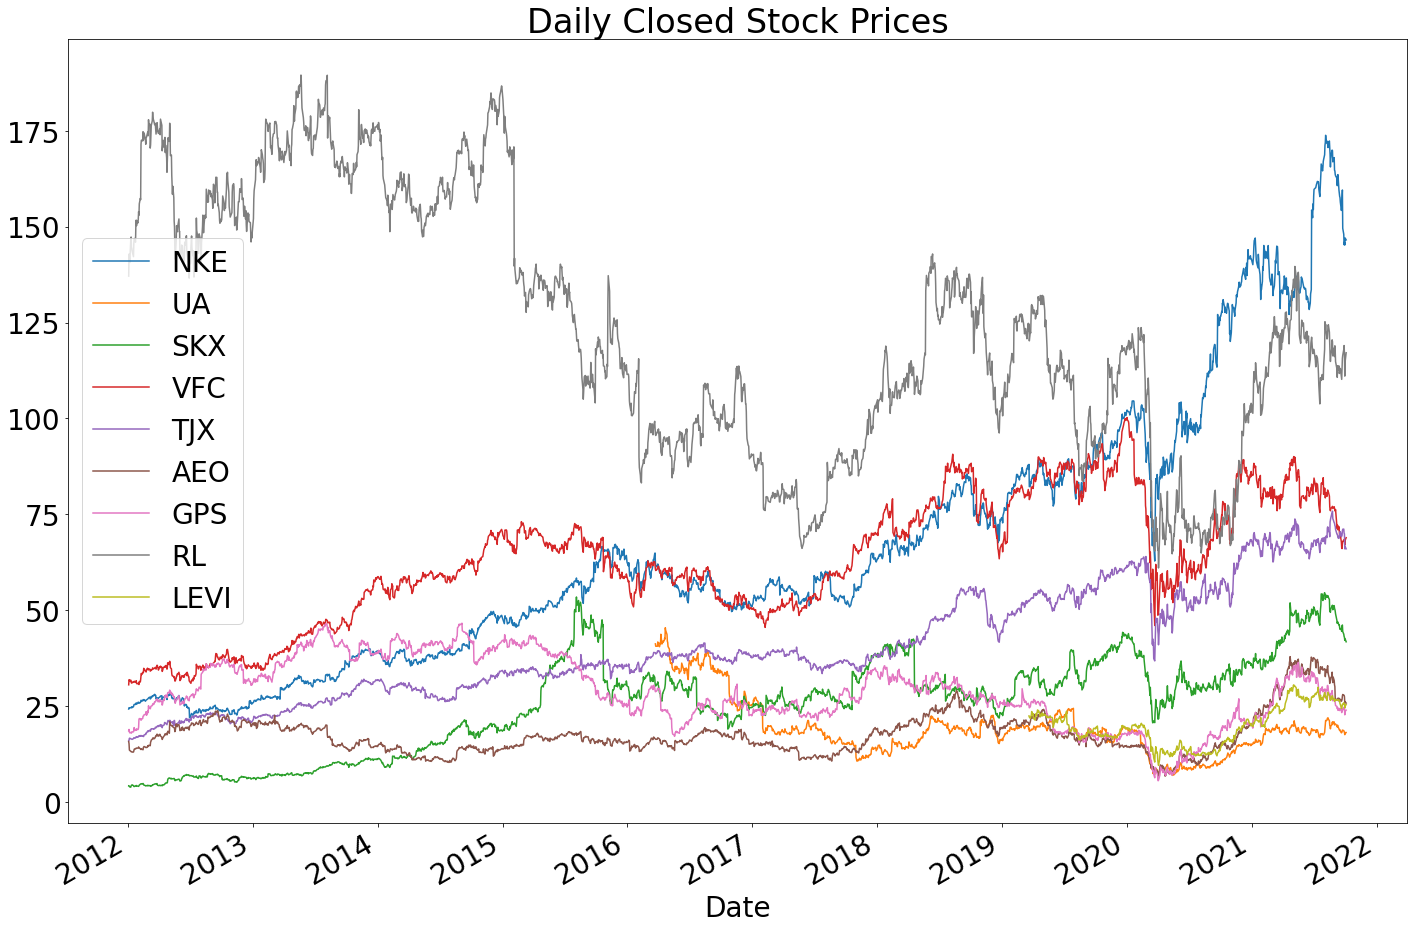

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 28})
fix, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Closed Stock Prices")

<ipython-input-17-5e01bf73f7d5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

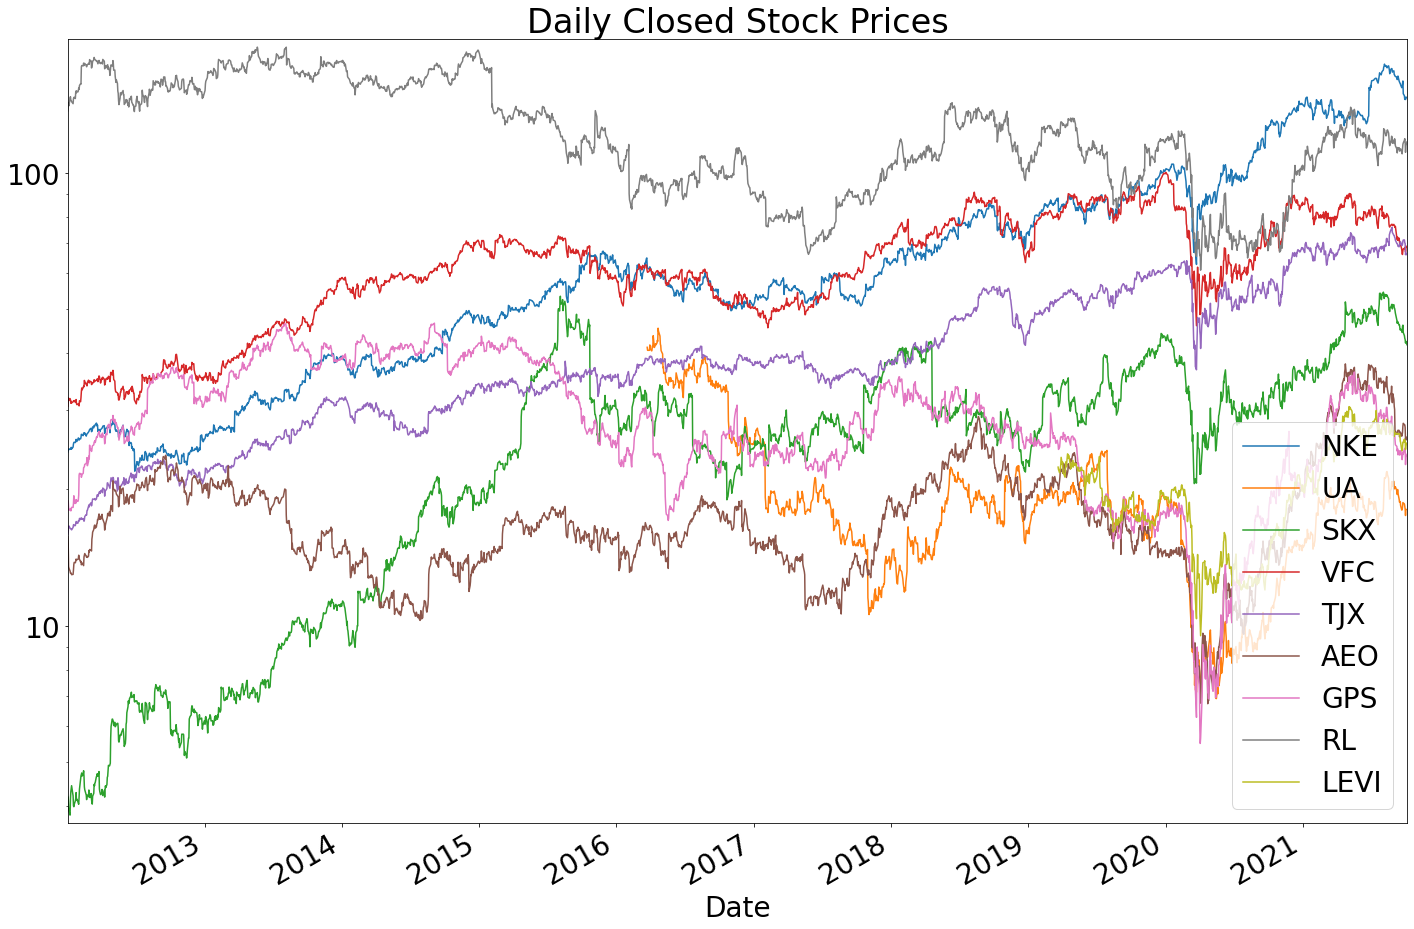

In [17]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Closed Stock Prices")
ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [18]:
price_change_data = close_data.pct_change() * 100
price_change_data

,NKE,UA,SKX,VFC,TJX,AEO,GPS,RL,LEVI
Date,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,1.456465,NaN,-0.317965,4.403486,1.130123,-3.562344,1.778975,4.200707,NaN
2012-01-05,-0.061085,NaN,-4.306216,-0.125576,2.917891,-10.817938,-3.230925,-0.503920,NaN
2012-01-06,-0.173193,NaN,-2.499998,-1.138965,0.226213,-0.887580,-1.477835,-1.027017,NaN
2012-01-09,0.367385,NaN,-2.051286,0.890248,-1.143548,-1.417907,0.333330,4.022746,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-28,-1.850845,-1.130243,-1.348880,-0.264046,-1.490016,-0.071911,0.081369,0.881581,-1.393191
2021-09-29,0.495527,-1.469790,-0.625725,0.808947,-0.256850,-1.259447,0.325203,-1.781365,0.667190
2021-09-30,-0.541028,-3.204419,-1.772393,-2.261458,-5.608009,-5.976681,-8.022688,-5.004704,-4.444442


<ipython-input-20-98168a128fe3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y)) + "%" for y in y_vals])


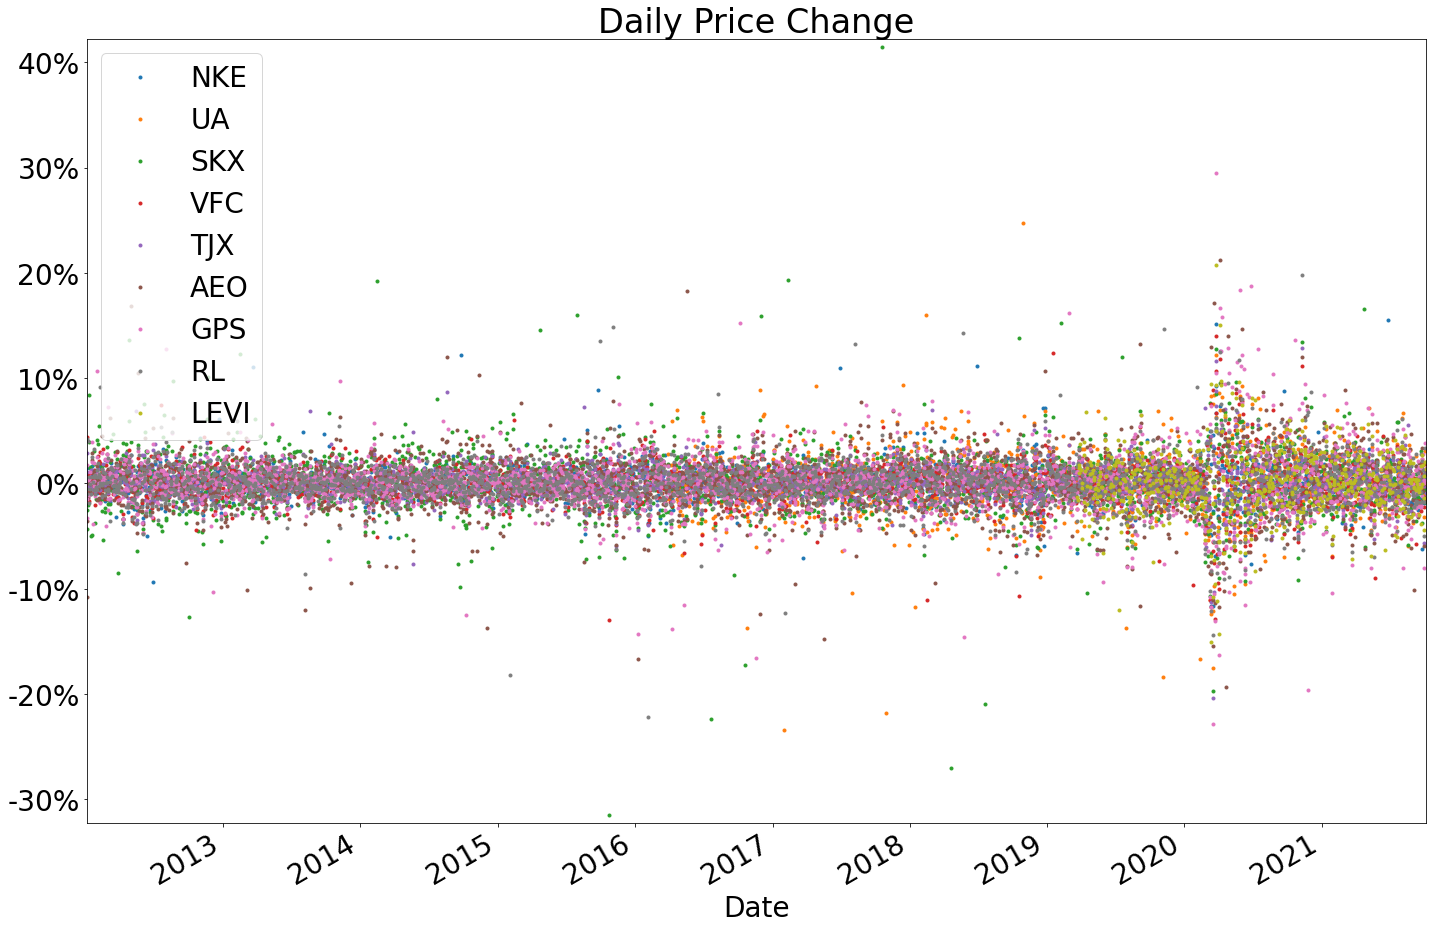

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
          price_change_data[key].plot.line(ls = "", marker = ".", ax = ax,
                                          legend = True)

plt.title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y)) + "%" for y in y_vals])

plt.show()
plt.close()

In [21]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,NKE,UA,SKX,VFC,TJX,AEO,GPS,RL,LEVI
Mean,0.087,-0.010,0.138,0.050,0.071,0.059,0.050,0.018,0.068
Median,1.446,-1.600,0.810,0.173,2.438,0.560,1.449,0.185,1.411
Variance,2.658,9.647,8.754,3.370,2.589,7.680,7.963,4.924,9.721
Standard Deviation,1.630,3.106,2.959,1.836,1.609,2.771,2.822,2.219,3.118
Skewness,0.890,-0.588,0.379,-0.342,-0.303,0.034,0.411,-0.022,0.198
Kurtosis,14.464,10.225,30.501,10.342,18.566,7.746,14.319,14.743,5.836


<ipython-input-22-0dc9b5de79fe>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


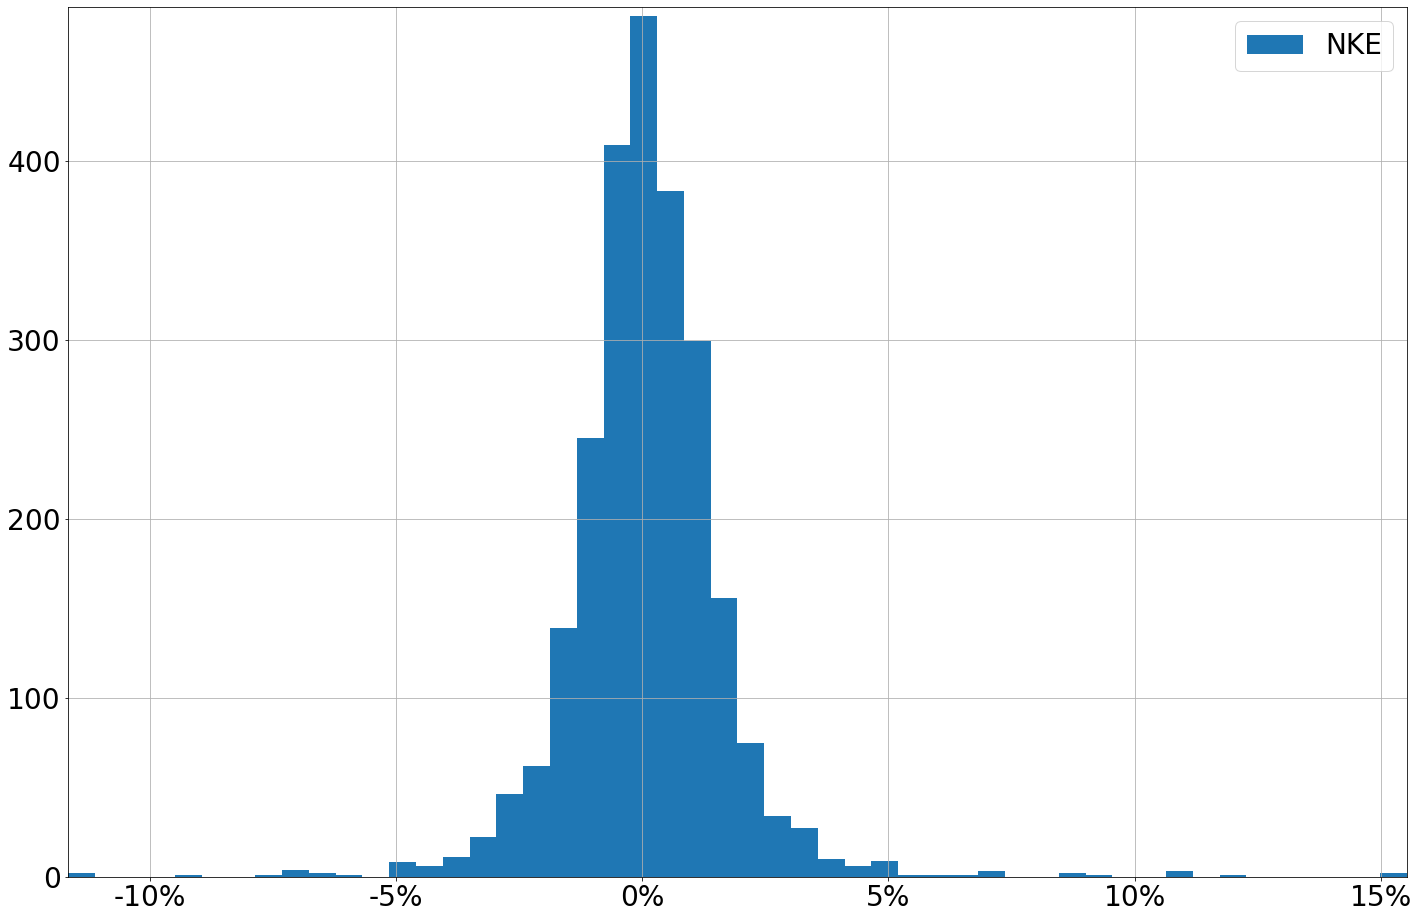

In [22]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["NKE"].hist(bins = 50, label = "NKE")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])

plt.legend()
plt.show()

<ipython-input-23-55913525d944>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-23-55913525d944>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


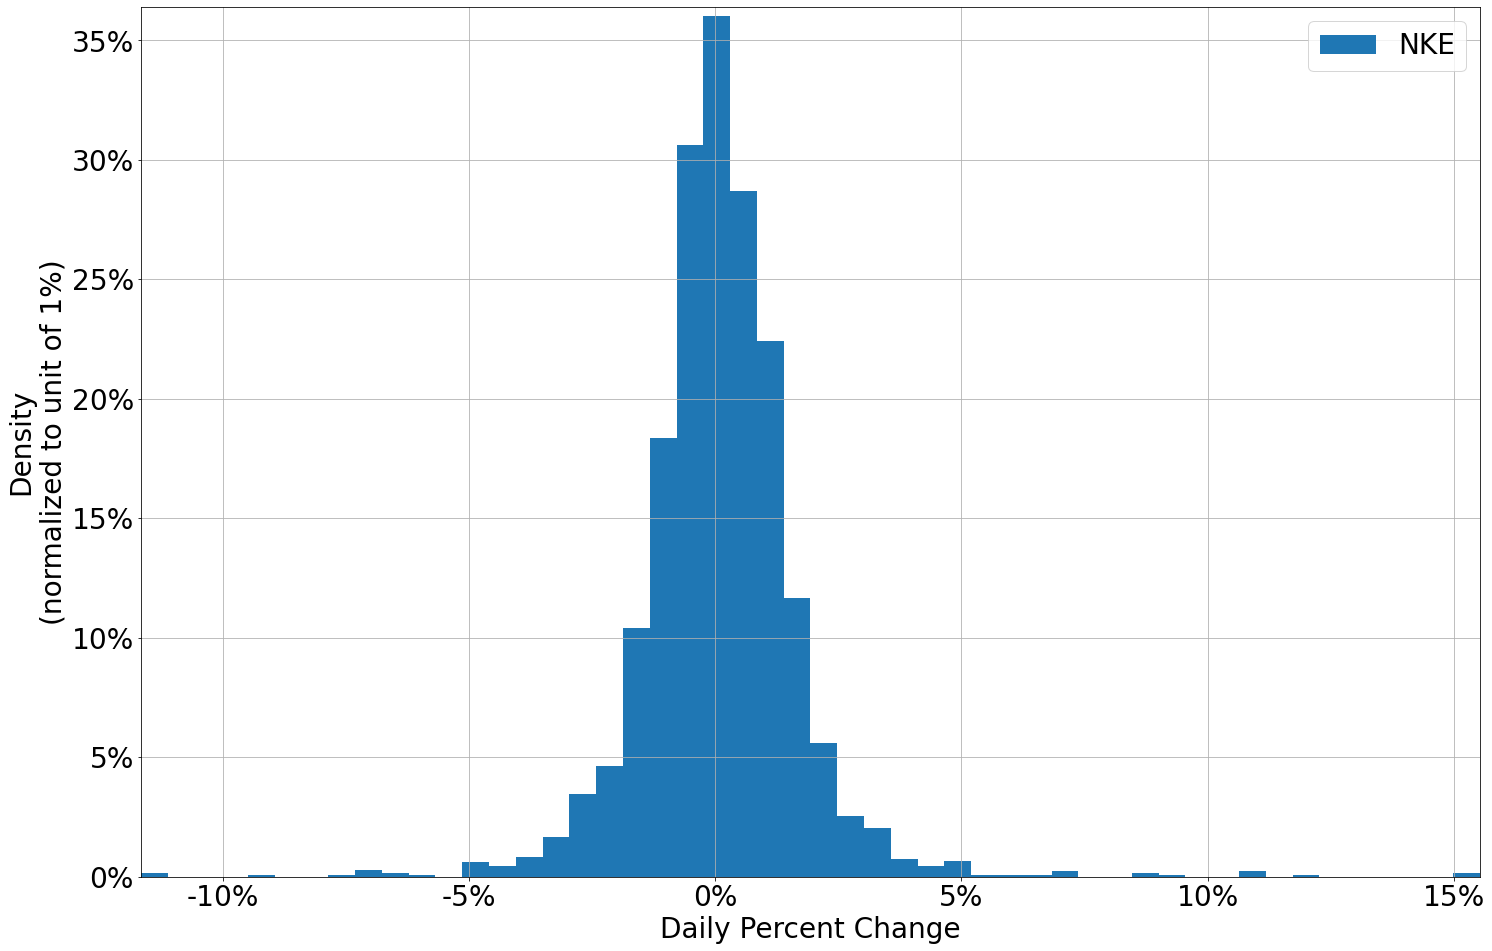

In [23]:
fig, ax = plt.subplots(figsize = (24, 16))
# Creates a histogram of the Apple stock
price_change_data["NKE"].hist(bins = 50, density = True, label = "NKE")

# Sets x values to %
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
# Sets x label title
ax.set_xlabel("Daily Percent Change")
# Sets y value to % for density instead of it being decimals
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
# Sets y label title
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

array([<AxesSubplot:title={'center':'NKE'}>,
       <AxesSubplot:title={'center':'UA'}>,
       <AxesSubplot:title={'center':'SKX'}>,
       <AxesSubplot:title={'center':'VFC'}>,
       <AxesSubplot:title={'center':'TJX'}>,
       <AxesSubplot:title={'center':'AEO'}>,
       <AxesSubplot:title={'center':'GPS'}>,
       <AxesSubplot:title={'center':'RL'}>,
       <AxesSubplot:title={'center':'LEVI'}>], dtype=object)

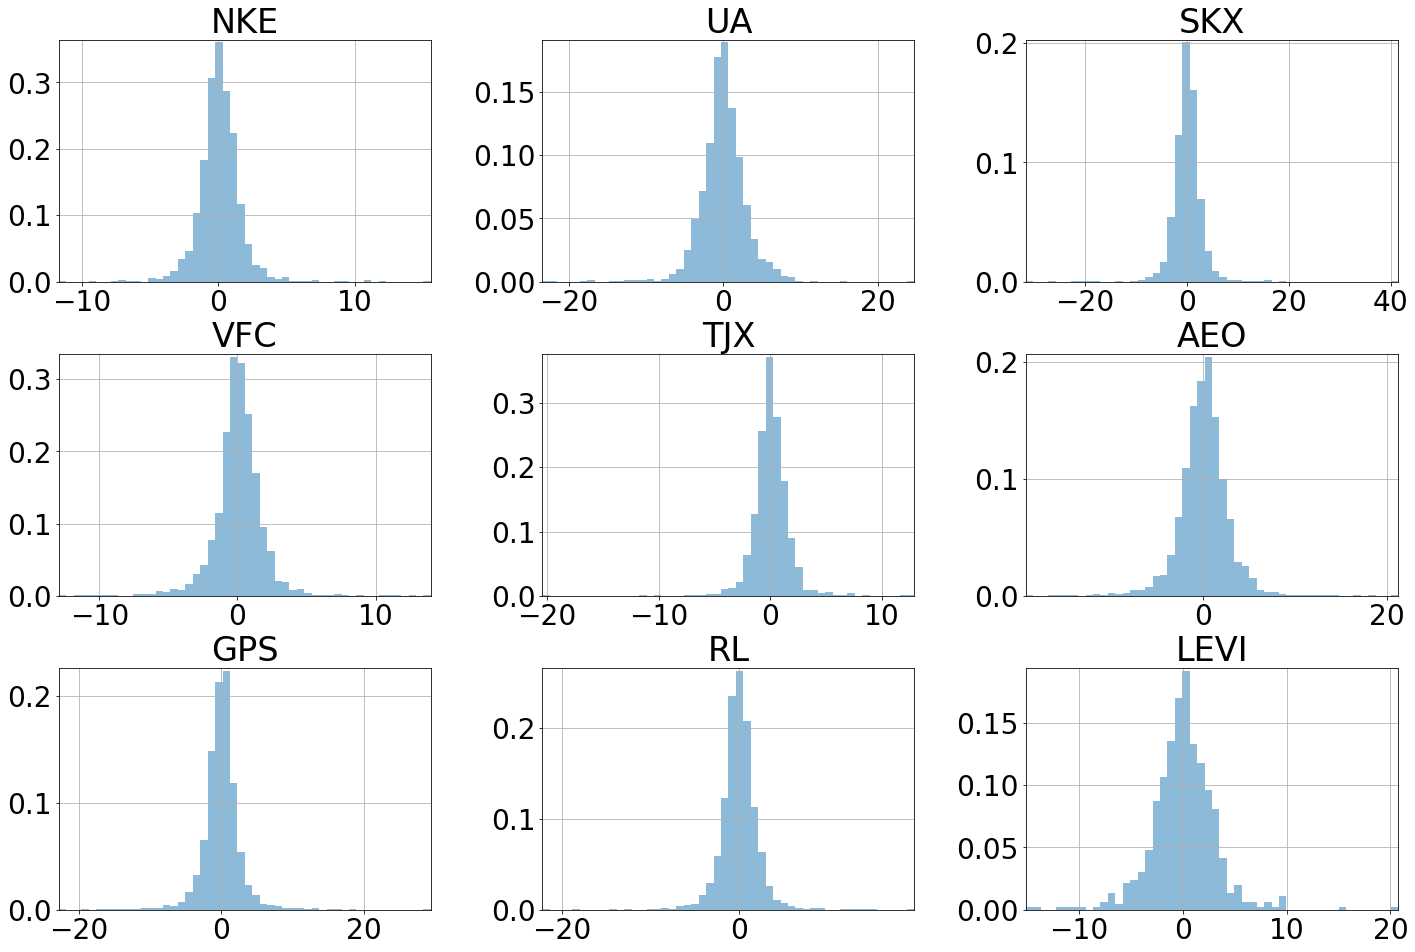

In [27]:
fig, ax = plt.subplots(3, 3, figsize = (24,16))
price_change_data.hist(bins = 50, alpha = 0.5,
                       label = price_change_data.keys(),
                       ax = ax, density = True)

<ipython-input-28-1a76649c070c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-28-1a76649c070c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


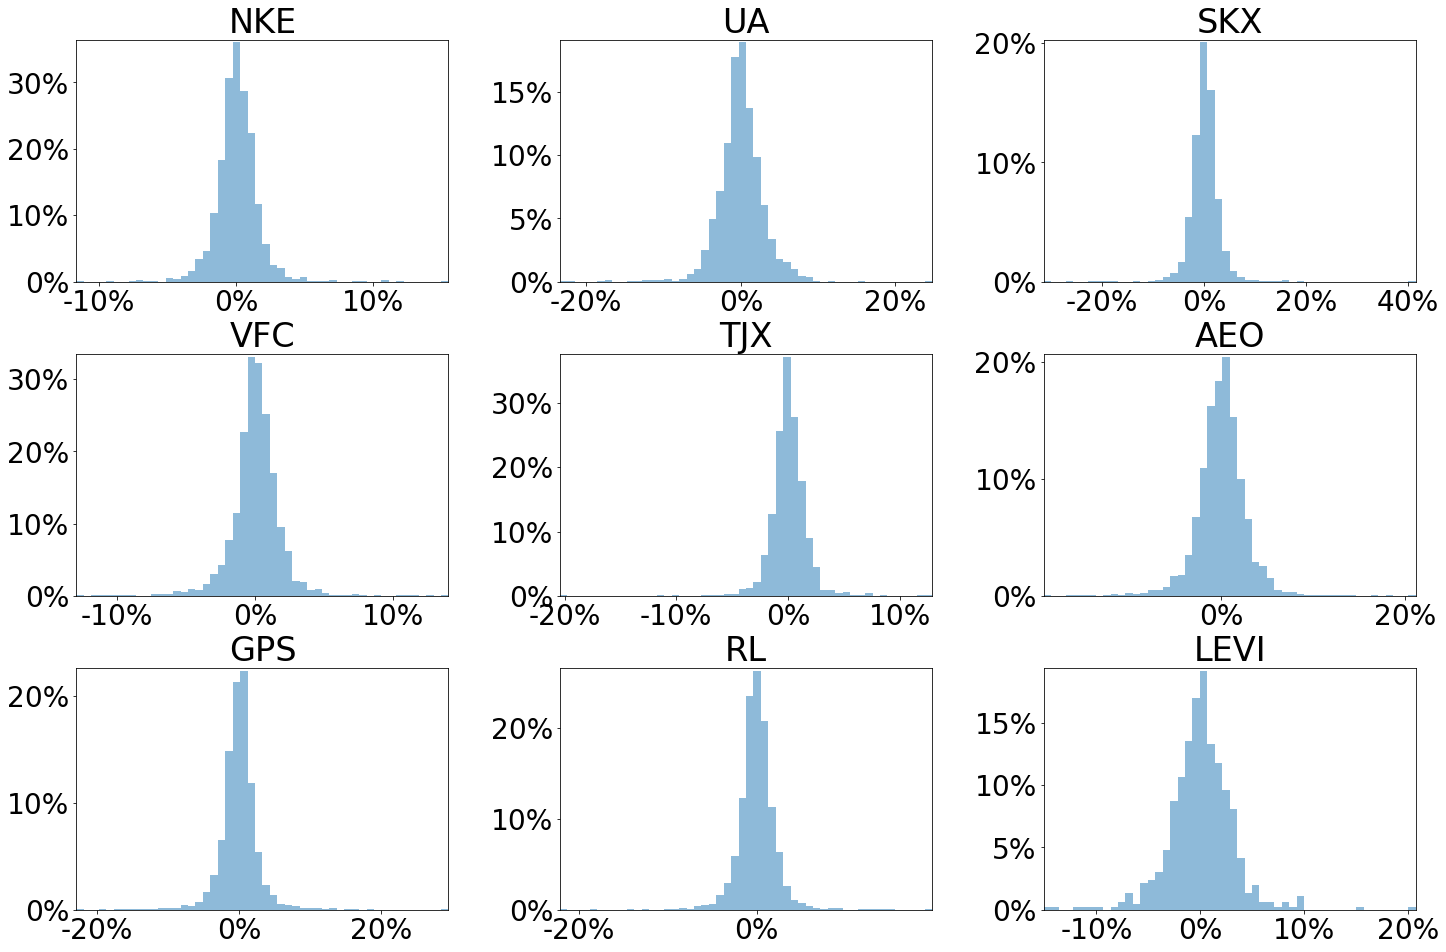

In [28]:
fig, ax = plt.subplots(3, 3, figsize = (24, 16))
price_change_data.hist(bins = 50, alpha = 0.5, 
                      label = price_change_data.keys(),
                      ax = ax, density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        # Goes through each individual plot from above
        a = ax[i][j]
        # Identifies each individual plot's title
        stock = a.get_title()
        # Sets title as stock name
        a.set_title(stock)
        
        # Sets x and y labels
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        # Removes the grid
        a.grid(False)

<ipython-input-29-6f3444408df1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-29-6f3444408df1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


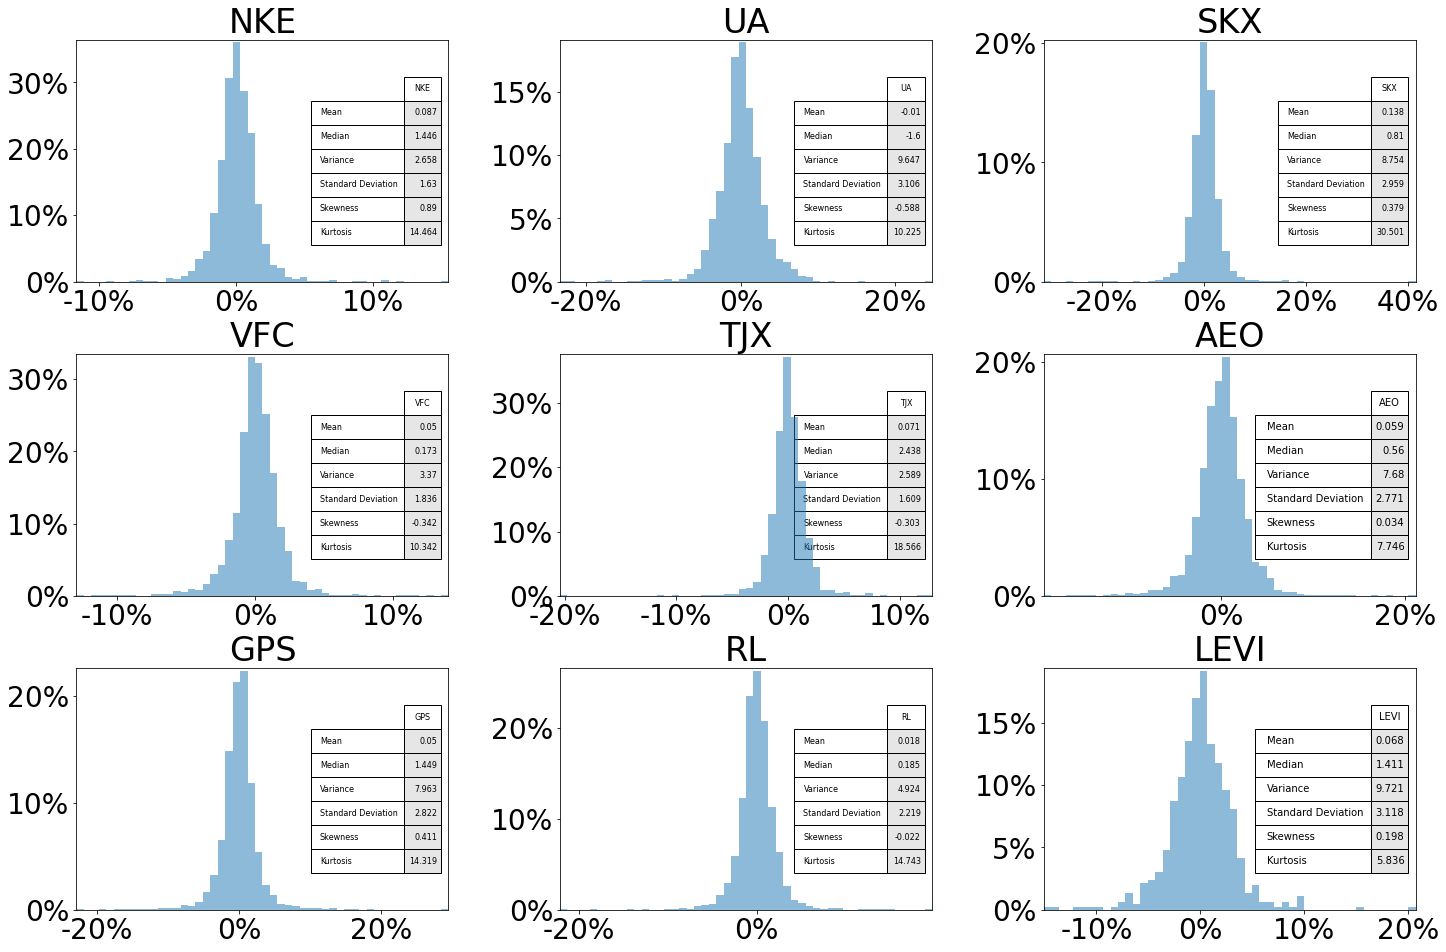

In [29]:
# Need to import this for the table
from pandas.plotting import table

fig, ax = plt.subplots(3, 3, figsize = (24, 16))
price_change_data.hist(bins = 50, alpha = 0.5, 
                      label = price_change_data.keys(),
                      ax = ax, density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        # Goes through each individual plot from above
        a = ax[i][j]
        # Identifies each individual plot's title
        stock = a.get_title()
        # Sets title as stock name
        a.set_title(stock)
        
        # Sets x and y labels
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        # Removes the grid
        a.grid(False)
        
        # Creates the table
        hist_data = stats_df[stock]
        stats_table = table(a, hist_data, colWidths = [0.1],
                     # Prints table numbers in light gray
                     cellColours = [[(0.9, 0.9, 0.9)]] * 6,
                     # Sets location of the table on the chart
                     loc = "center right")
        # Sets scale of table
        stats_table.scale(1,2)

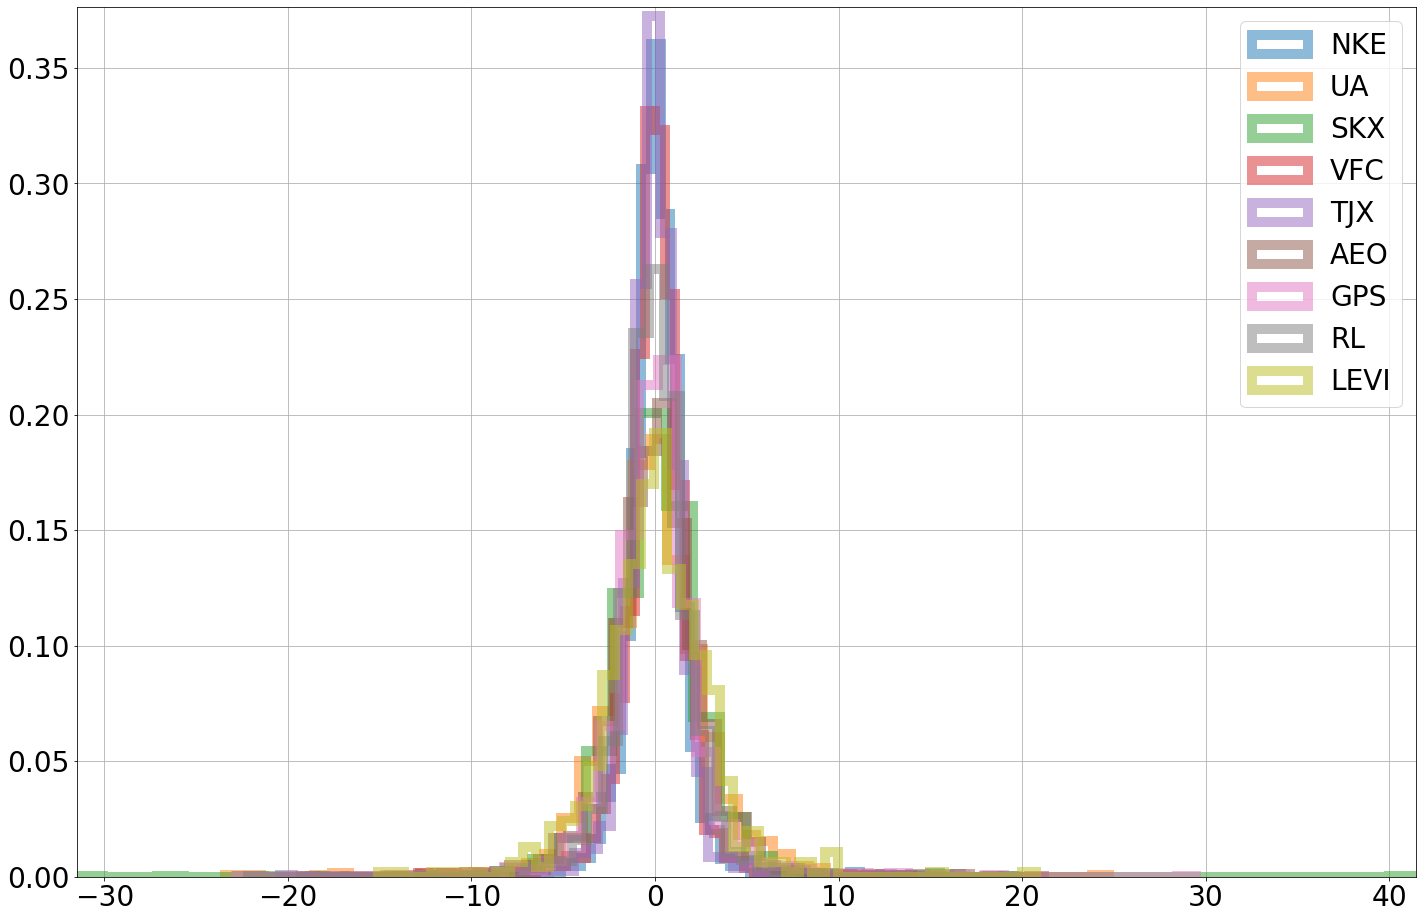

In [30]:
# Makes it easier to compare
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = 0.5, 
                      label = key, linewidth = 10,
                      density = True)
    
plt.legend()